# Errores y convergencia de Funciones

Cuando estamos programando nos interesa saber el error que estamos teniendo en nuestro programa, si converge o no y cuanto tarda.

Vamos a calcular el error de las funciones que hemos programado.

In [58]:
#Primero a importar cosas!

In [59]:
from pylab import*
%matplotlib inline

In [60]:
def fac(n):
    
    #defining variable
    f=1

    #definimos el conjunto en que va a correr mi indice.
    conjunto = range(2,n+1)

    #empezamos nuestro ciclo
    for i in conjunto:
        f=f*i
    return f
    #OBS: dentro del ciclo estamos escribiendo dos veces f, una adentro del ciclo for para
    #ver cada iteracion de mi ciclo, la segunda para obtener el resultado final.

SENO hecho en casa

In [61]:
def y1(x,w):
    y=0
    err_max=0
    for n in range(w):
        p=2*n+1
        y+= (((-1)**n)*(x**p)/fac(p))
        err_max = abs(x**(p+2))/fac(p+2)
    return y, err_max

def y2(x,w):
    y=0
    err_max=0
    for n in range(w):
        p=2*n
        y+=(((-1)**n)*(x**p)/fac(p))
        err_max = abs(x**(p+2))/fac(p+2)
    return y, err_max

def sen(num, orden):
    num=num%(2*pi)
    if num < (pi/4):
        x = num
        y1(x,orden)
    elif (pi/4) <= num < (2*pi/4):
        z = num - (pi/2)
        y= y2(z,orden)
    elif (2*pi/4) <= num < (3*pi/4):
        z = num - (pi/2)
        y= y2(z,orden)
    elif (3*pi/4) <= num < (pi):
        x = pi-num
        y= y1(x,orden)
    elif (pi) <= num < (5*pi/4):
        x = -(num-pi)
        y= y1(x,orden)
    elif (5*pi/4) <= num < (6*pi/4):
        z = num-(3*pi/2)
        y= -y2(z,orden)
    elif (6*pi/4) <= num < (7*pi/4):
        z = num-(3*pi/2)
        y= -y2(z,orden)
    elif (7*pi/4) <= num < (2*pi):
        x = num-2*pi
        y = y1(x,orden)
    return y, err_max

SENO hecho en clase

In [62]:
def mi_seno(x,orden):
    
    #Es util trabajar en modulo 2pi porque mi serie de taylor 
    #pierde precision conforme mis numeros son mas grandes.
    x = x%(2*pi)
    y = 0.0
    #print ("El valor original es equivalente a: "+str(x)+" modulo 2pi")
    
    #Tambien queremos que nos diga en que intervalo de pi medios 
    #esta el numero del que quiero calcular el seno.
    if x <= (pi/2):
        x=x
    elif (pi/2) < x <= pi:
        x=pi-x
    elif pi < x <= (3*pi/2):
        x=-(x-pi)
    else:
        x=x-2*pi
    
    #Usaremos un for para hacer la serie de Taylor
    for n in range(orden):    
        p = 2*n+1
        y += (((-1)**n)*(x**(p))/(factorial_super(p)))
        #y += significa y = y + ....
        
        #EL error!!!!!
        err_max = abs(x**(p+2))/fac(p+2)
    
    return y, err_max

In [63]:
for n in range(1,16):
    print "n=", n, "", mi_seno(pi/2,n)

n= 1  (1.5707963267948966, 0.6459640975062462)
n= 2  (0.9248322292886504, 0.07969262624616703)
n= 3  (1.0045248555348174, 0.004681754135318687)
n= 4  (0.9998431013994987, 0.00016044118478735975)
n= 5  (1.0000035425842861, 3.598843235212084e-06)
n= 6  (0.999999943741051, 5.692172921967924e-08)
n= 7  (1.0000000006627803, 6.688035109811464e-10)
n= 8  (0.9999999999939768, 6.066935731106192e-12)
n= 9  (1.0000000000000437, 4.377065467313739e-14)
n= 10  (1.0, 2.571422892860472e-16)
n= 11  (1.0000000000000002, 1.2538995405354564e-18)
n= 12  (1.0000000000000002, 5.156455176580277e-21)
n= 13  (1.0000000000000002, 1.8123993128488855e-23)
n= 14  (1.0000000000000002, 5.507285786522379e-26)
n= 15  (1.0000000000000002, 1.4611487106644664e-28)


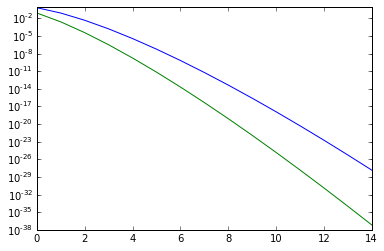

In [64]:
error=zeros(15)
error2=zeros(15)
for i in range(1,len(error)+1):
    error[i-1]=mi_seno(pi/2,i)[1]
    error2[i-1]=mi_seno(pi/4,i)[1]
plot(error)
plot(error2)
yscale('log')
show()

La grafica nos esta indicando que mi funcion converge de manera exponencial a la funcion del seno :) :) :)

In [66]:
%timeit range(1000) 
#la funcion time it esta corriendo el range a partir de 100000 
#y a partir de eso saca los tiempos

100000 loops, best of 3: 12.1 µs per loop


In [67]:
%timeit mi_seno(pi/4,6)

10000 loops, best of 3: 23 µs per loop


In [70]:
%timeit sin(pi/4)

The slowest run took 10.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.17 µs per loop


In [65]:
error=zeros(15)
error2=zeros(15)
for i in range(1,len(error)+1):
    error[i-1]=sen(pi/2,i)[1]
    error2[i-1]=sen(pi/4,i)[1]
plot(error)
plot(error2)
yscale('log')
show()

NameError: global name 'err_max' is not defined

In [69]:
%timeit sen(pi/4,6)

NameError: global name 'err_max' is not defined